# DataFrame 5: Muertes por episodio II
Lista episodios

Muertes y su importancia

In [32]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
# sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [33]:
df_muertes_epi2 = pd.read_csv('../data/muertes_x_episodio2.csv')
df_muertes_epi2

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,NaN,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


In [34]:
df_muertes_epi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6887 entries, 0 to 6886
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order             6887 non-null   int64  
 1   season            6887 non-null   int64  
 2   episode           6887 non-null   int64  
 3   character_killed  6887 non-null   object 
 4   killer            6410 non-null   object 
 5   method            6887 non-null   object 
 6   method_cat        6887 non-null   object 
 7   reason            6886 non-null   object 
 8   location          6887 non-null   object 
 9   allegiance        3136 non-null   object 
 10  importance        6886 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 592.0+ KB


In [35]:
df_muertes_epi2_clean = df_muertes_epi2.drop(["reason","allegiance"], axis=1)
df_muertes_epi2_clean


,order,season,episode,character_killed,killer,method,method_cat,location,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Beyond the Wall,2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Beyond the Wall,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Winterfell,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Winterfell,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Winterfell,1.0
...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,King’s Landing,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,King’s Landing,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,King’s Landing,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,King’s Landing,1.0


In [36]:
df_muertes_epi2_clean.to_csv("../data_clean/df_muertes_epi2_clean.csv", index=False)

esta tabla muestra dónde se ha matado en cada temporada, clasificado por colores según el método (categoría, no específico... hay muchos)

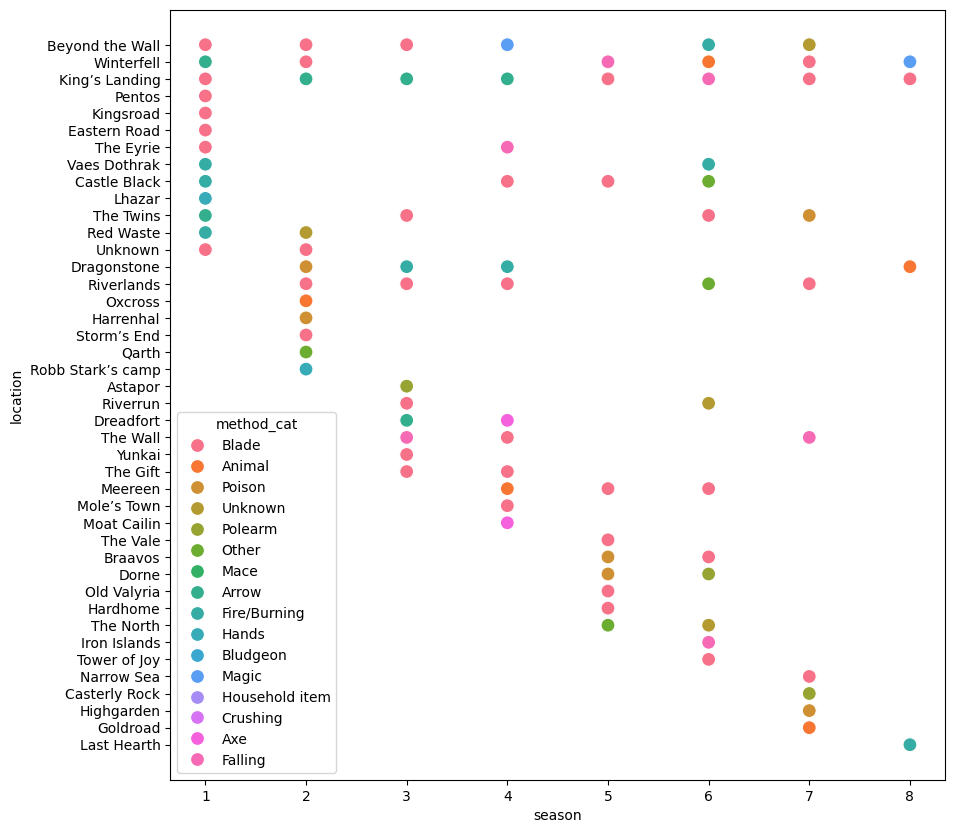

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_muertes_epi2_clean['season'],
                y=df_muertes_epi2_clean['location'],
                hue = df_muertes_epi2_clean['method_cat'],
                s=100);

Muertes por temporada (para comparar con otros datasets)

<Axes: title={'center': 'Muertes por temporada'}, xlabel='season'>

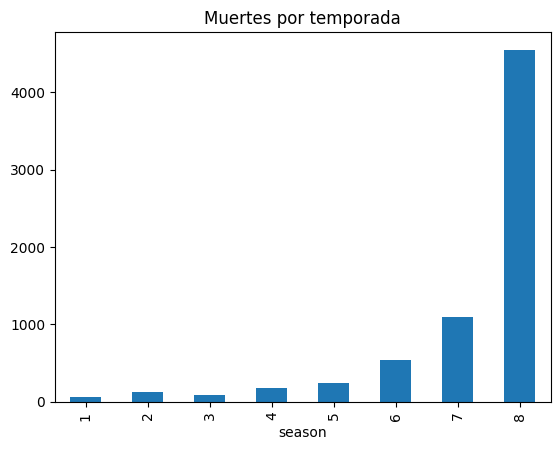

In [38]:
df_muertes_epi2_clean['season'].value_counts().sort_index().plot(kind='bar', title='Muertes por temporada')

muertes por episodio (relativo). Curioso: los terceros episodios son los más sangrientos

<Axes: title={'center': 'Muertes por episodio'}, xlabel='episode'>

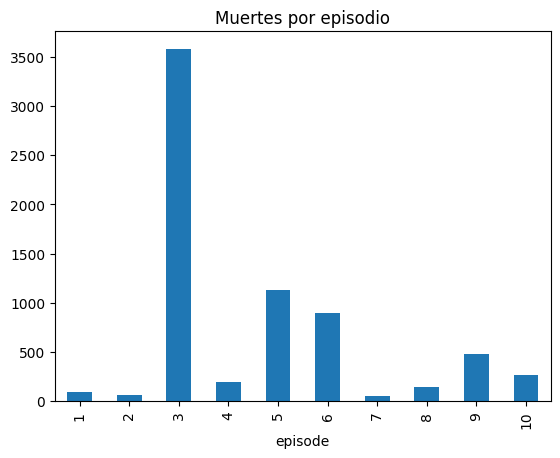

In [39]:
df_muertes_epi2_clean['episode'].value_counts().sort_index().plot(kind='bar', title='Muertes por episodio')

top asesinos (comparacion)
los caminantes blancos y luego daenerys. Arya está tan arriba porque al matar al rey blaco, mata a todos sus caminantes

<Axes: title={'center': 'Top asesinos'}, ylabel='killer'>

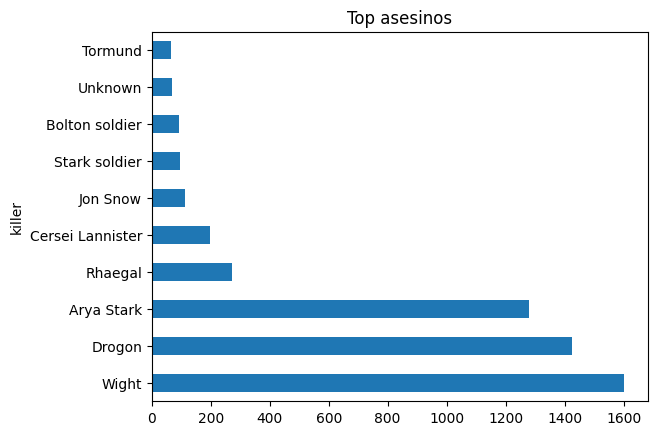

In [40]:
df_muertes_epi2_clean['killer'].value_counts().head(10).plot(kind='barh', title='Top asesinos')


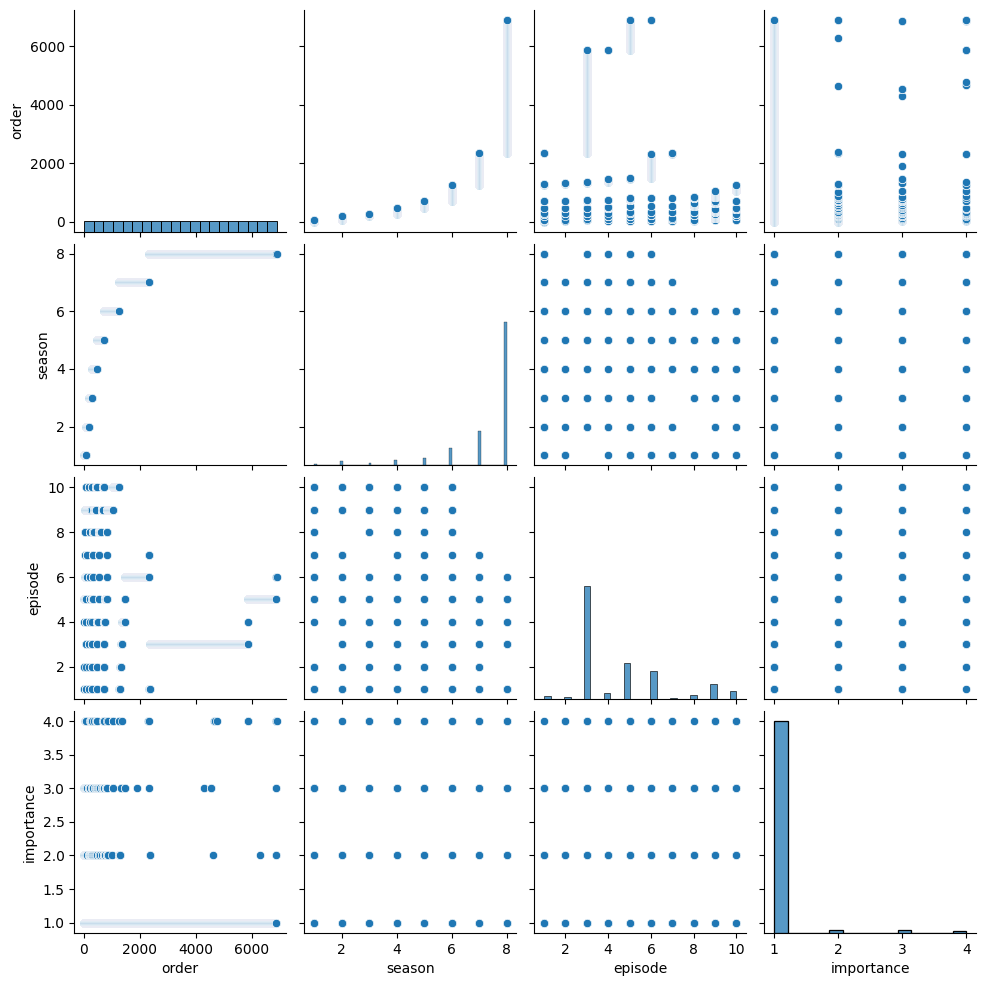

In [ ]:
# plt.figure(figsize=(6,6))
sns.pairplot(df_muertes_epi2_clean);
#usar con datos numéricos